# **Housing Prices Prediction — Advanced Regression Techniques**

**Author:** Milos Saric [https://saricmilos.com/]  
**YOUTUBE:** English: @realskillsoverdegrees ; Serbian: @saricmilos  
**Date:** October 13, 2025  
**Dataset:** Kaggle — *House Prices: Advanced Regression Techniques*  

---

This notebook explores the Kaggle housing dataset to predict home sale prices using advanced regression techniques.  
The analysis will guide you through the complete data science workflow, including:

1. **Problem Definition** – Clearly define the objective and evaluation metric (RMSE/RMSLE).  

2. **Data Collection** – Acquire training and test datasets from Kaggle.  

3. **Exploratory Data Analysis (EDA)** – Investigate and visualize data to reveal patterns and relationships.  

4. **Feature Engineering** – Handle missing values, encode categorical variables, create new features, and transform skewed data.  

5. **Model Development** – Apply advanced regression methods such as Ridge, Lasso, ElasticNet, Gradient Boosting (XGBoost, LightGBM, CatBoost), and stacking/ensembling strategies.  

6. **Evaluation & Testing** – Assess performance with cross-validation, validate results, and interpret model predictions.  

The goal of this project is to apply advanced regression strategies to a real-world dataset and build accurate, interpretable models for predicting housing prices.  

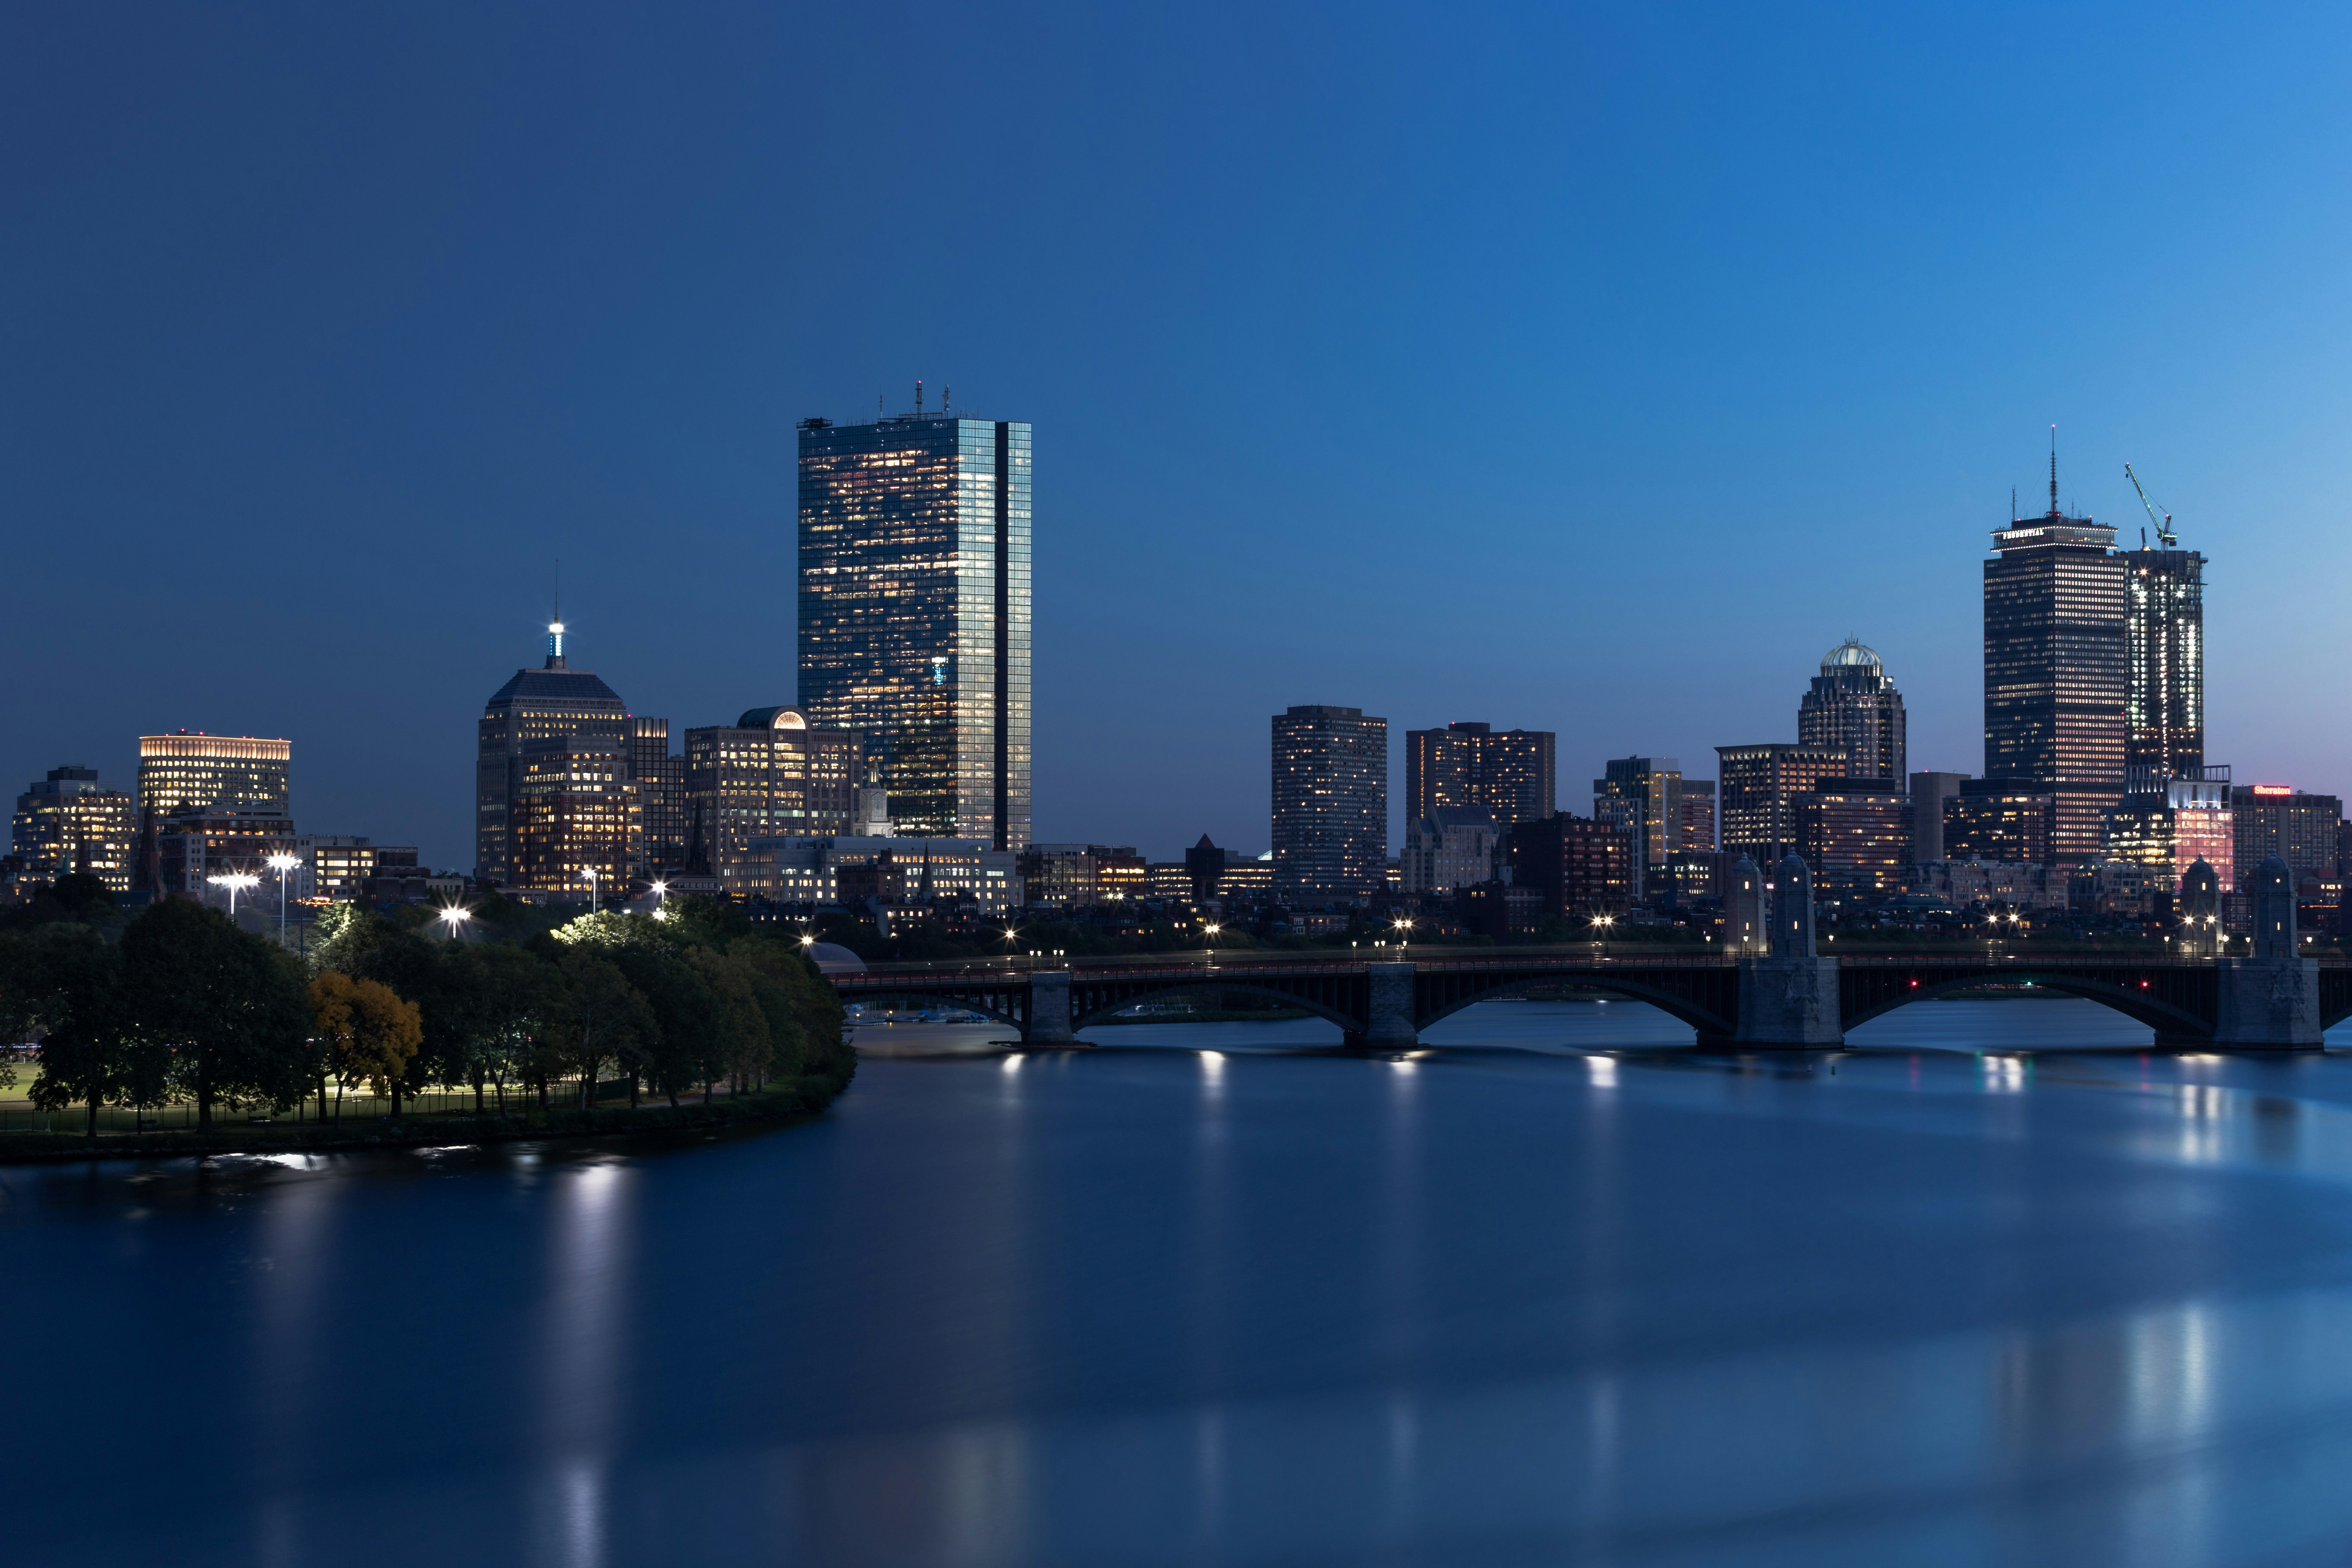

In [487]:
from IPython.display import Image

Image(filename=r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\housing-price-prediction\Images\Boston.jpg")

## **1. Problem Definition**

The first step is to establish a clear understanding of the challenge we aim to solve. This phase lays the groundwork for the entire project and ensures all subsequent efforts remain aligned with the primary objective.

### Objective
Predict the **sale price of residential properties** based on various features such as location, square footage, number of rooms, age of the house, neighborhood characteristics, and engineered features derived from the dataset.

### Scope
The analysis focuses on the provided housing dataset. Predictions are restricted to the homes listed in this dataset, without incorporating external data sources (e.g., market trends, interest rates) unless explicitly integrated.

### Stakeholders
- **Real Estate Analysts / Agencies**: Support accurate property valuations and market insights.  
- **Home Buyers & Sellers**: Estimate fair pricing and make better-informed decisions.  
- **Data Scientists / ML Practitioners**: Refine skills in regression modeling, feature engineering, and evaluation metrics.  
- **Business Decision Makers**: Integrate predictive insights into pricing strategies.

### Success Criteria
Achieve **low error rates** in predicting housing prices, evaluated using metrics such as **Root Mean Squared Error (RMSE)**, **Mean Absolute Error (MAE)**, and **R² score**. A successful model delivers predictions that closely approximate true market values, making it both reliable and practical for real-world use.

> A precisely defined problem is the foundation of an accurate solution!

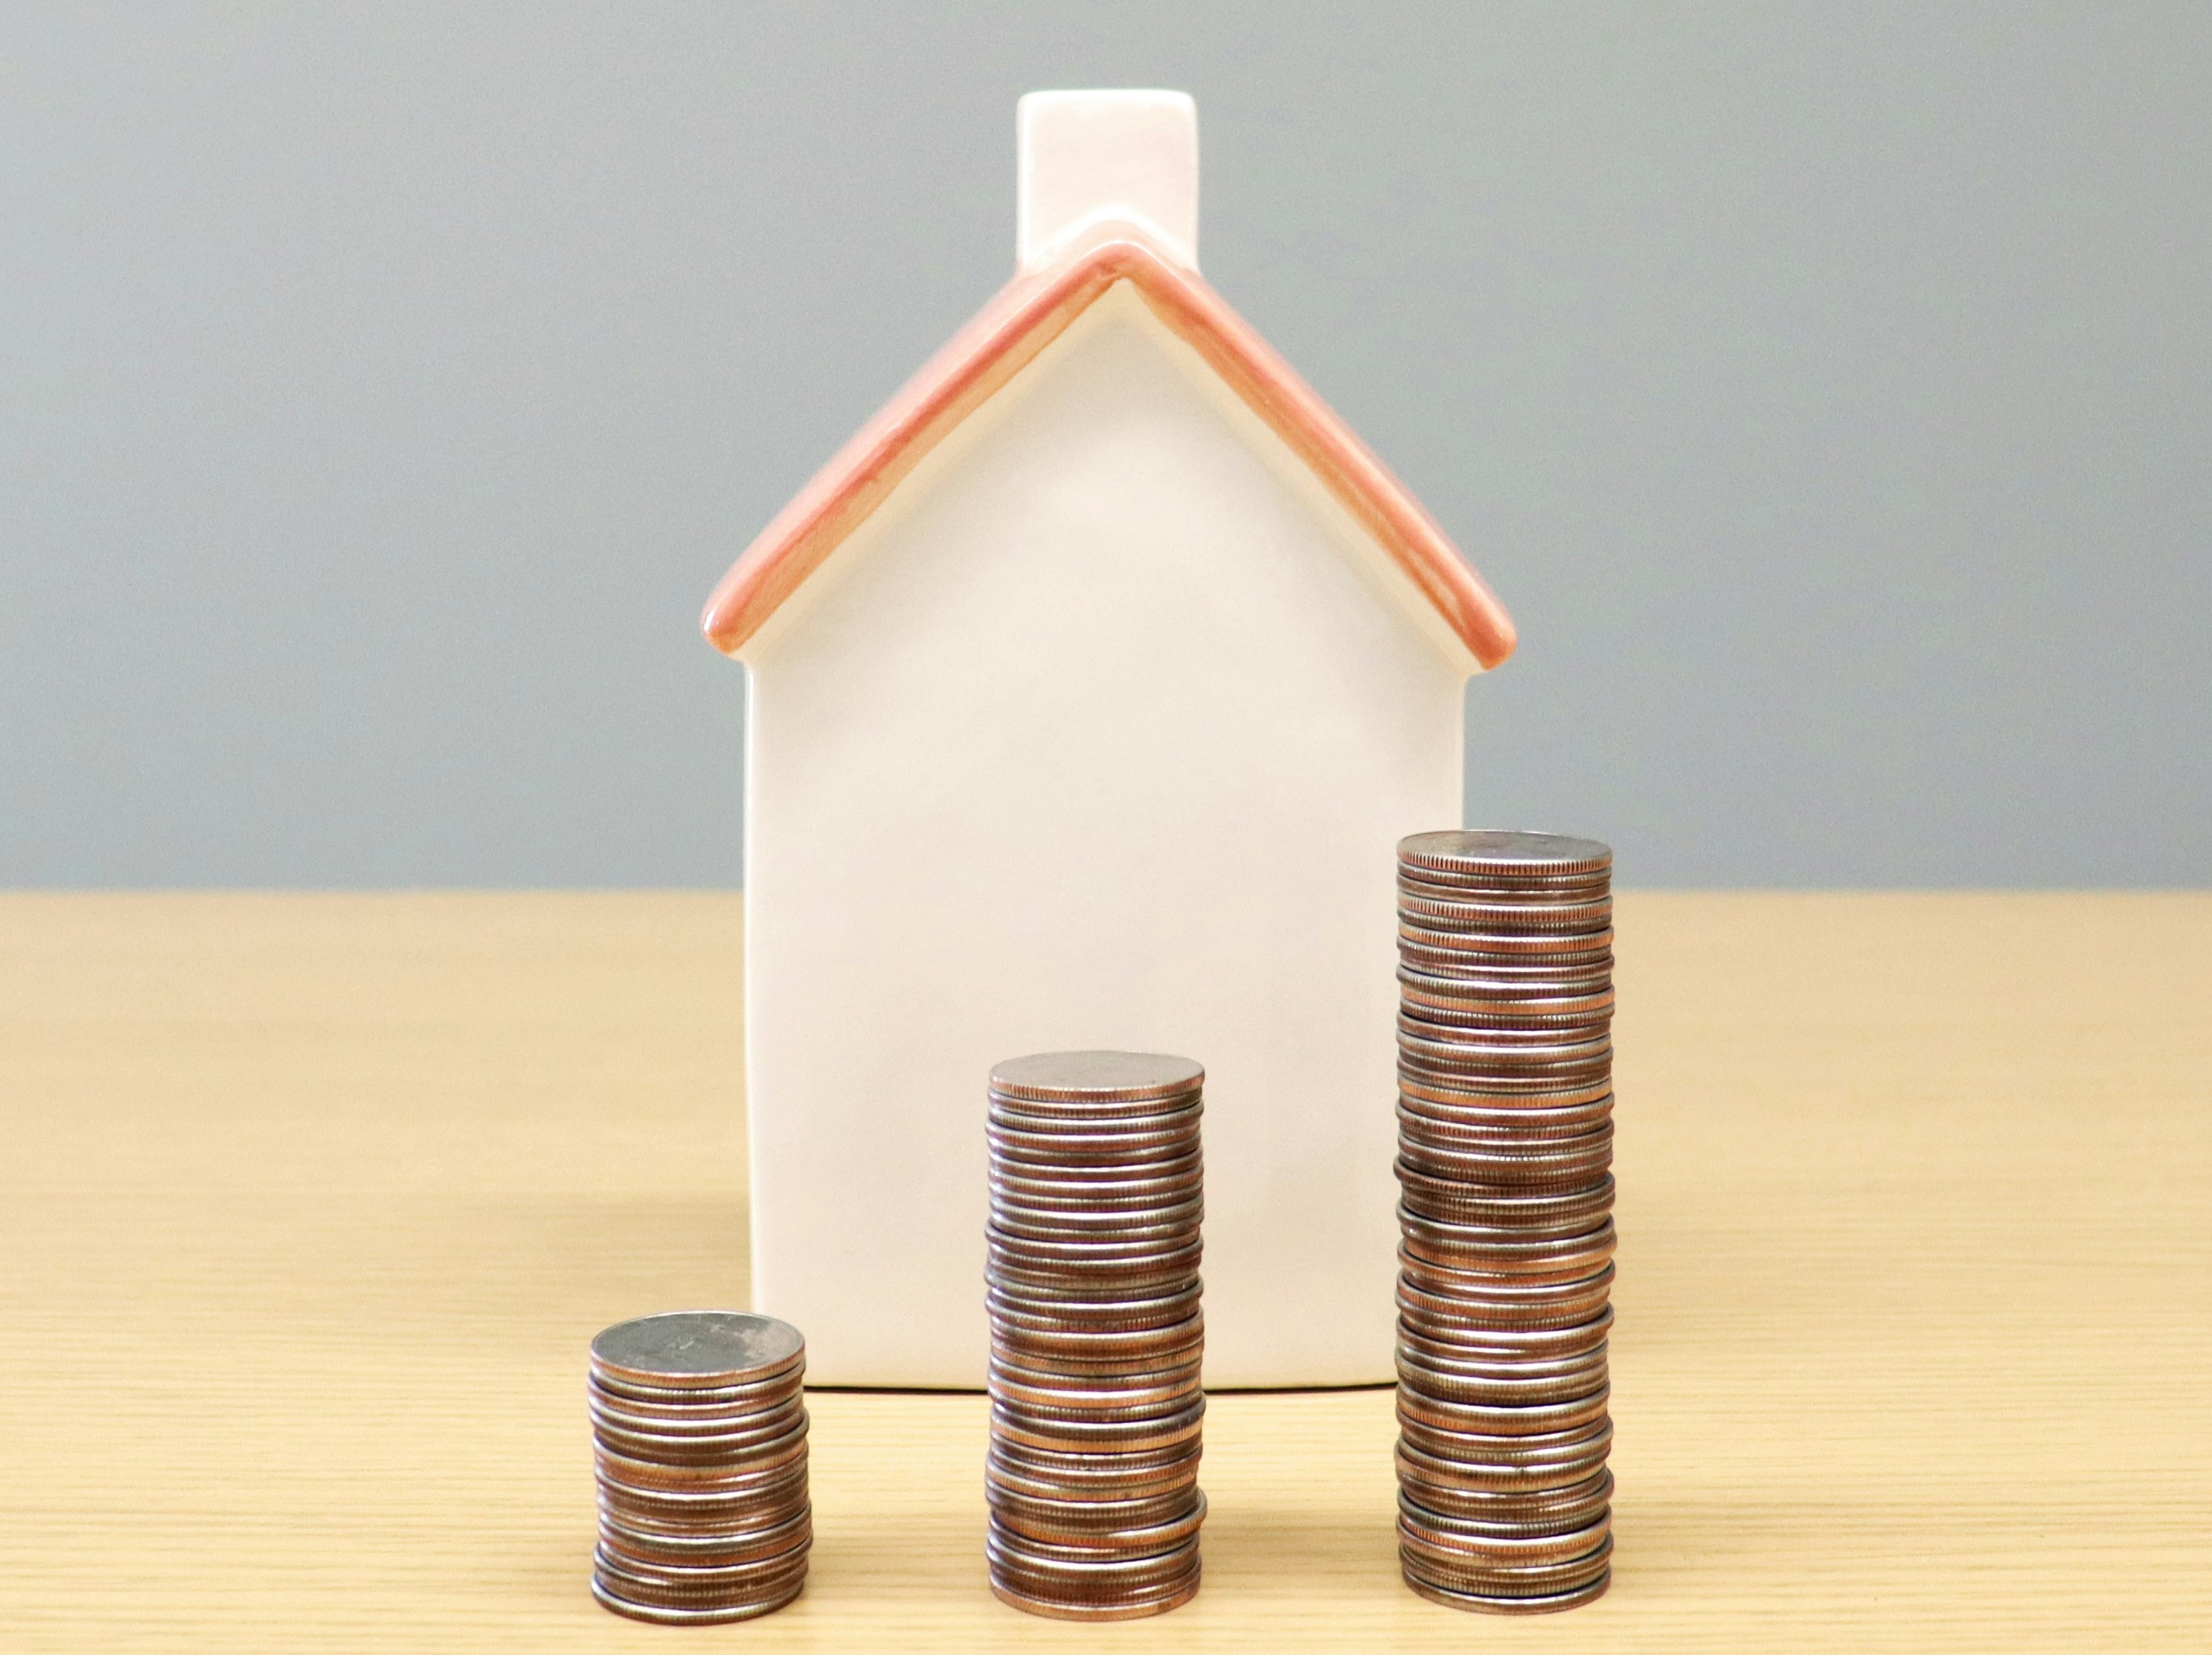

In [488]:
Image(filename=r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\housing-price-prediction\Images\Price_prediction.jpg")

## **2. Data Collection**

The **Data Collection** phase focuses on acquiring the datasets necessary for building the predictive model and setting up the environment for efficient analysis. This step also involves importing essential libraries and creating reusable functions to streamline the workflow.

For this project, the housing datasets include both training and testing data containing property features such as location, size, number of rooms, year built, and other relevant attributes.

You can access the datasets through the following sources:

- **1.** Download directly from my GitHub: [https://github.com/saricmilos/housing-price-prediction](https://github.com/saricmilos/housing-price-prediction)

- **2.** Access publicly available housing datasets on Kaggle: [Housing Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

Both sources provide the same dataset, so you can use whichever is most convenient for your workflow.

### Required Libraries Import

In [489]:
# Core libraries
import os                  # For interacting with the operating system
from pathlib import Path   # For convenient and platform-independent file path handling
import re                  # Regular expressions for text processing if needed
from typing import Any
import math

# Data manipulation
import pandas as pd        # DataFrames for structured data manipulation
import numpy as np         # Numerical computing, arrays, mathematical operations

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns             # Advanced visualization (heatmaps, pairplots, etc.)

# Machine learning preprocessing and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder  
# StandardScaler: Normalize numeric features
# LabelEncoder: Encode categorical labels into numeric form

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# train_test_split: Split data into training and testing sets
# KFold: Cross-validation splits
# cross_val_score: Evaluate models using cross-validation
# GridSearchCV: Hyperparameter tuning

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# Evaluation metrics for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set visualization style
sns.set(style="whitegrid")

# Suppress warnings to keep the notebook output clean
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings, e.g., deprecation or convergence warnings

# Note:
# Use this carefully: warnings provide useful information about potential issues.
# It's generally okay to suppress them during exploratory analysis or presentations.

from sklearn.preprocessing import MinMaxScaler

In [490]:
from utils import load_dataset, plot_missing_values_heatmap,plot_missing_values_barchart, plot_number_of_unique_values, plot_categorical_values_distributions, get_column_types, get_missing_value_summary

In [491]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\Milos\\Desktop\\ESCAPE_9-5\\PYTHON\\GitHub_Kaggle_Projects\\housing-price-prediction\\utils.py'>

In [492]:
dataset_folder = Path(r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\housing-price-prediction\Data")
datasets = {}

In [493]:
for csv_file in dataset_folder.glob("*.csv"):
    datasets[csv_file.stem] = load_dataset(csv_file)

In [494]:
print(f"{datasets.keys()}")

dict_keys(['sample_submission', 'test', 'train'])


##  **3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is all about **understanding the dataset**, uncovering patterns, spotting anomalies, and generating insights that will guide feature engineering and modeling.

In [495]:
datasets["train"].head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [496]:
datasets["train"].describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [497]:
datasets["test"].describe()

Id   MSSubClass  ...       MoSold       YrSold
count  1459.000000  1459.000000  ...  1459.000000  1459.000000
mean   2190.000000    57.378341  ...     6.104181  2007.769705
std     421.321334    42.746880  ...     2.722432     1.301740
min    1461.000000    20.000000  ...     1.000000  2006.000000
25%    1825.500000    20.000000  ...     4.000000  2007.000000
50%    2190.000000    50.000000  ...     6.000000  2008.000000
75%    2554.500000    70.000000  ...     8.000000  2009.000000
max    2919.000000   190.000000  ...    12.000000  2010.000000

[8 rows x 37 columns]

In [498]:
shapes = pd.DataFrame({
    "Dataset": ["Training", "Test"],
    "Shape": [datasets["train"].shape, datasets["test"].shape]
})
print(shapes.to_string(index=False))

 Dataset      Shape
Training (1460, 81)
    Test (1459, 80)


The train dataset contains 1460 rows and 81 columns.

The test dataset contains 1459 rows and 80 columns. Note that unlike the training dataset, it **does not include the target column `SalePrice`**, which we aim to predict using our model.

In [499]:
from IPython.display import display, HTML 

with open(r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\housing-price-prediction\Data\data_description.txt", "r") as f:
    content = f.read()

# Display the entire text inside a scrollable block
display(HTML(f"<pre style='max-height:500px;overflow:auto'>{content}</pre>"))

In [500]:
# Now run info() or just display the DataFrame
datasets["train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## **3.1. Missing Values**

### **3.1.1 Training Set**

In [501]:
na_counts_train = datasets["train"].isna().sum().reset_index()
na_counts_train.columns = ['Feature', 'MissingValues']

In [502]:
na_counts_train

Feature  MissingValues
0              Id              0
1      MSSubClass              0
2        MSZoning              0
3     LotFrontage            259
4         LotArea              0
..            ...            ...
76         MoSold              0
77         YrSold              0
78       SaleType              0
79  SaleCondition              0
80      SalePrice              0

[81 rows x 2 columns]

In [503]:
summary_nan_train = get_missing_value_summary(datasets["train"])

In [504]:
print(
    summary_nan_train[summary_nan_train["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
      PoolQC  object         1460           1453                 7       99.520548
 MiscFeature  object         1460           1406                54       96.301370
       Alley  object         1460           1369                91       93.767123
       Fence  object         1460           1179               281       80.753425
  MasVnrType  object         1460            872               588       59.726027
 FireplaceQu  object         1460            690               770       47.260274
 LotFrontage float64         1460            259              1201       17.739726
  GarageType  object         1460             81              1379        5.547945
 GarageYrBlt float64         1460             81              1379        5.547945
GarageFinish  object         1460             81              1379        5.547945
  GarageQual  object         1460             81              1379        5.547945
  Ga

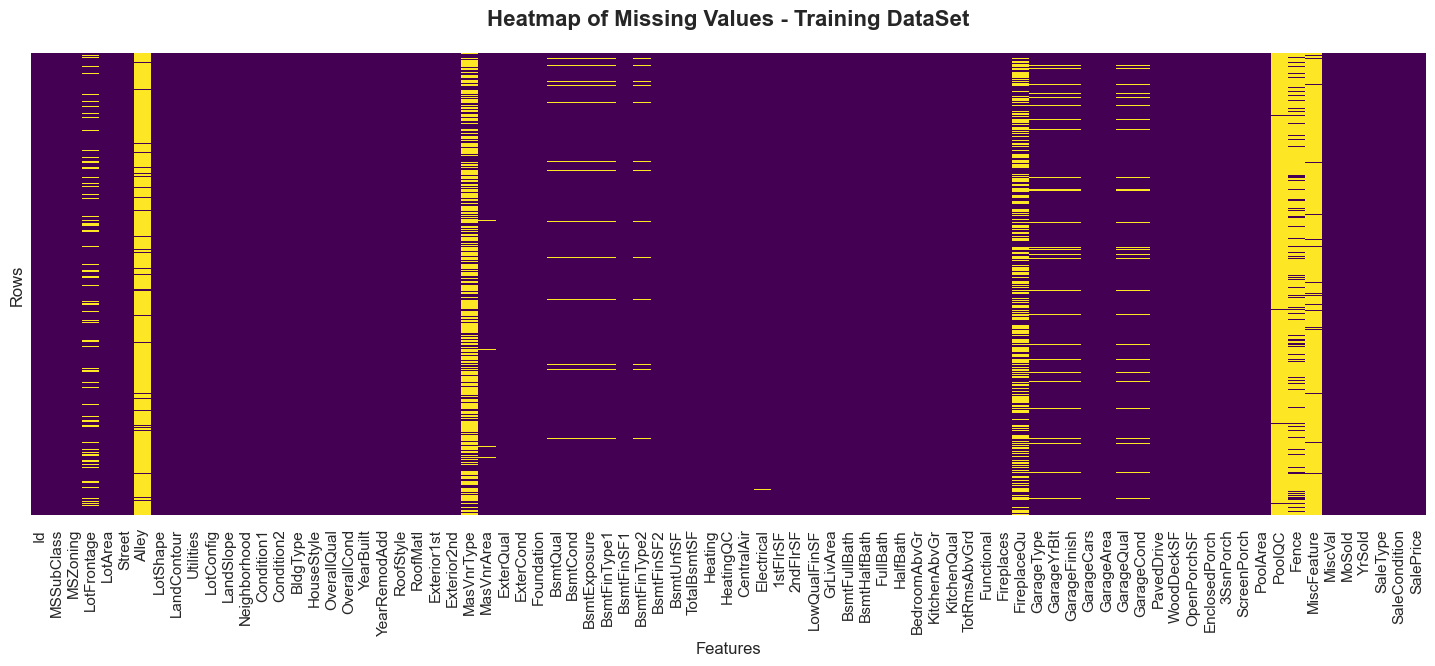

In [505]:
plot_missing_values_heatmap(datasets["train"], "Training DataSet")

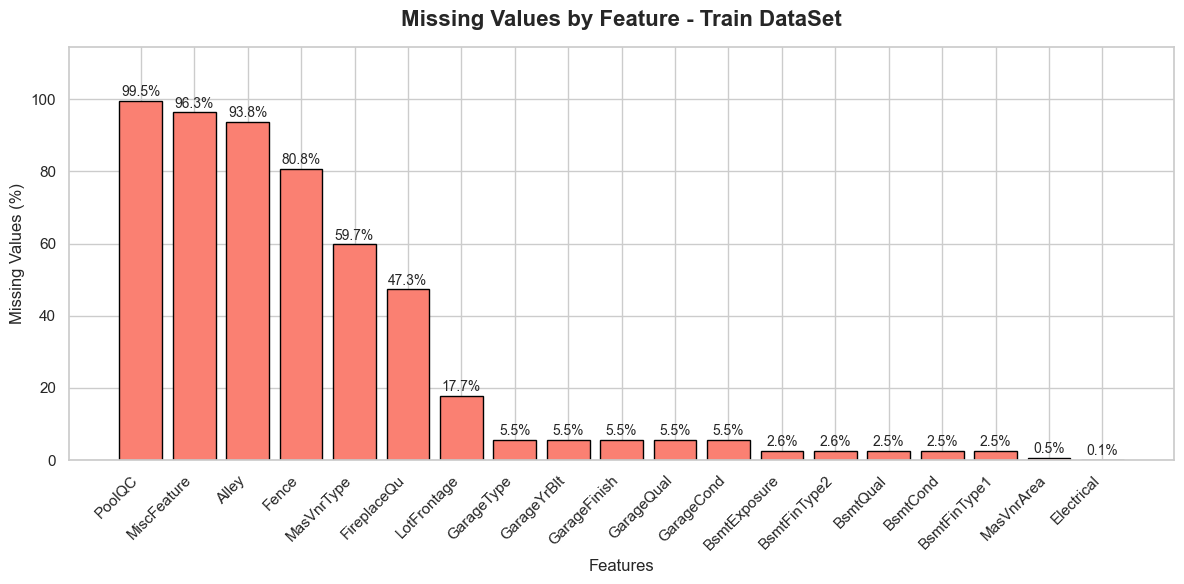

In [506]:
plot_missing_values_barchart(datasets["train"],"Train DataSet")

In [507]:
cat_cols_train, int_cols_train, float_cols_train = get_column_types(datasets["train"])

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Integer variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'E

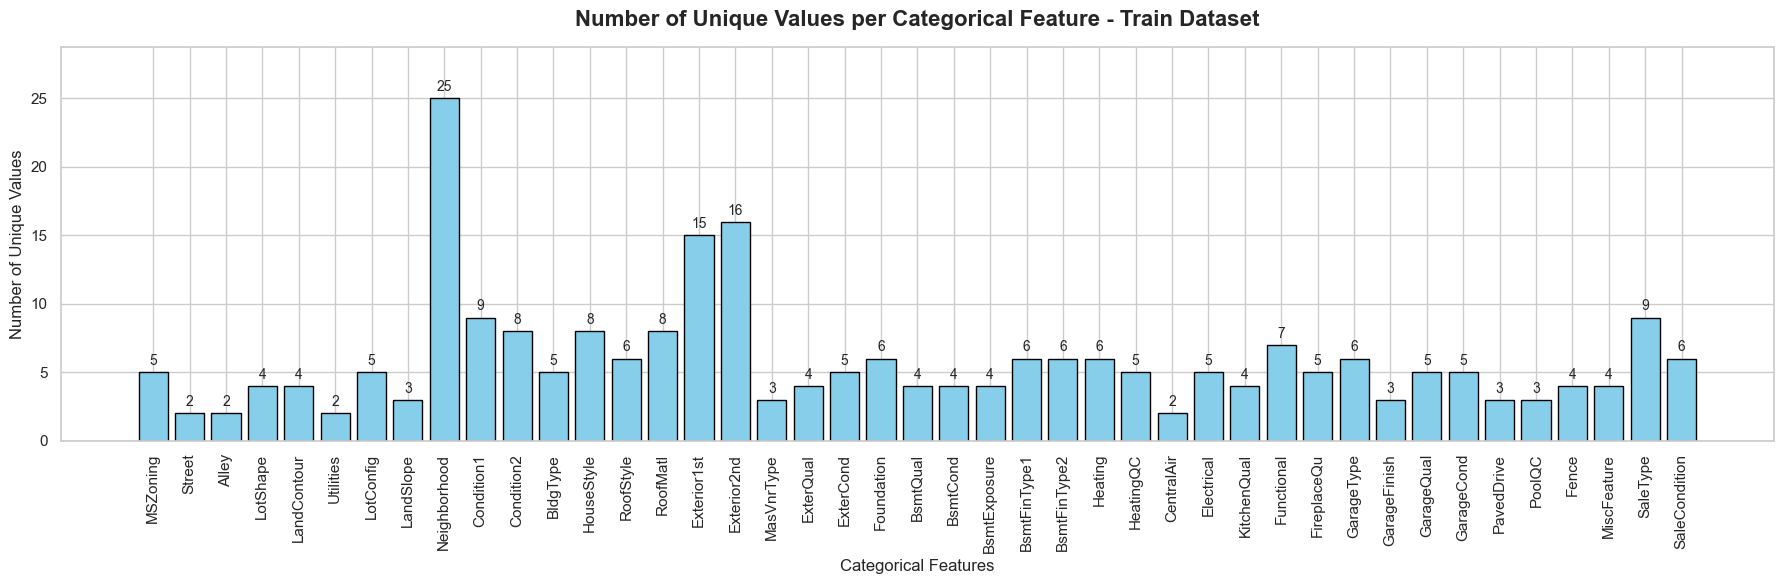

In [508]:
plot_number_of_unique_values(datasets["train"],cat_cols_train,"Train Dataset")

In [509]:
# Loop through categorical columns
for col in cat_cols_train:
    train_unique = set(datasets["train"][col].dropna().unique())
    test_unique = set(datasets["test"][col].dropna().unique())
    
    # Find differences
    only_in_train = train_unique - test_unique
    only_in_test = test_unique - train_unique
    
    if only_in_train or only_in_test:  # Print only if there are differences
        print(f"Column: {col}")
        if only_in_train:
            print(f"  Only in train: {only_in_train}")
        if only_in_test:
            print(f"  Only in test: {only_in_test}")
        print("-"*50)

Column: Utilities
  Only in train: {'NoSeWa'}
--------------------------------------------------
Column: Condition2
  Only in train: {'RRAe', 'RRNn', 'RRAn'}
--------------------------------------------------
Column: HouseStyle
  Only in train: {'2.5Fin'}
--------------------------------------------------
Column: RoofMatl
  Only in train: {'Roll', 'Membran', 'Metal', 'ClyTile'}
--------------------------------------------------
Column: Exterior1st
  Only in train: {'ImStucc', 'Stone'}
--------------------------------------------------
Column: Exterior2nd
  Only in train: {'Other'}
--------------------------------------------------
Column: Heating
  Only in train: {'Floor', 'OthW'}
--------------------------------------------------
Column: Electrical
  Only in train: {'Mix'}
--------------------------------------------------
Column: GarageQual
  Only in train: {'Ex'}
--------------------------------------------------
Column: PoolQC
  Only in train: {'Fa'}
-------------------------------

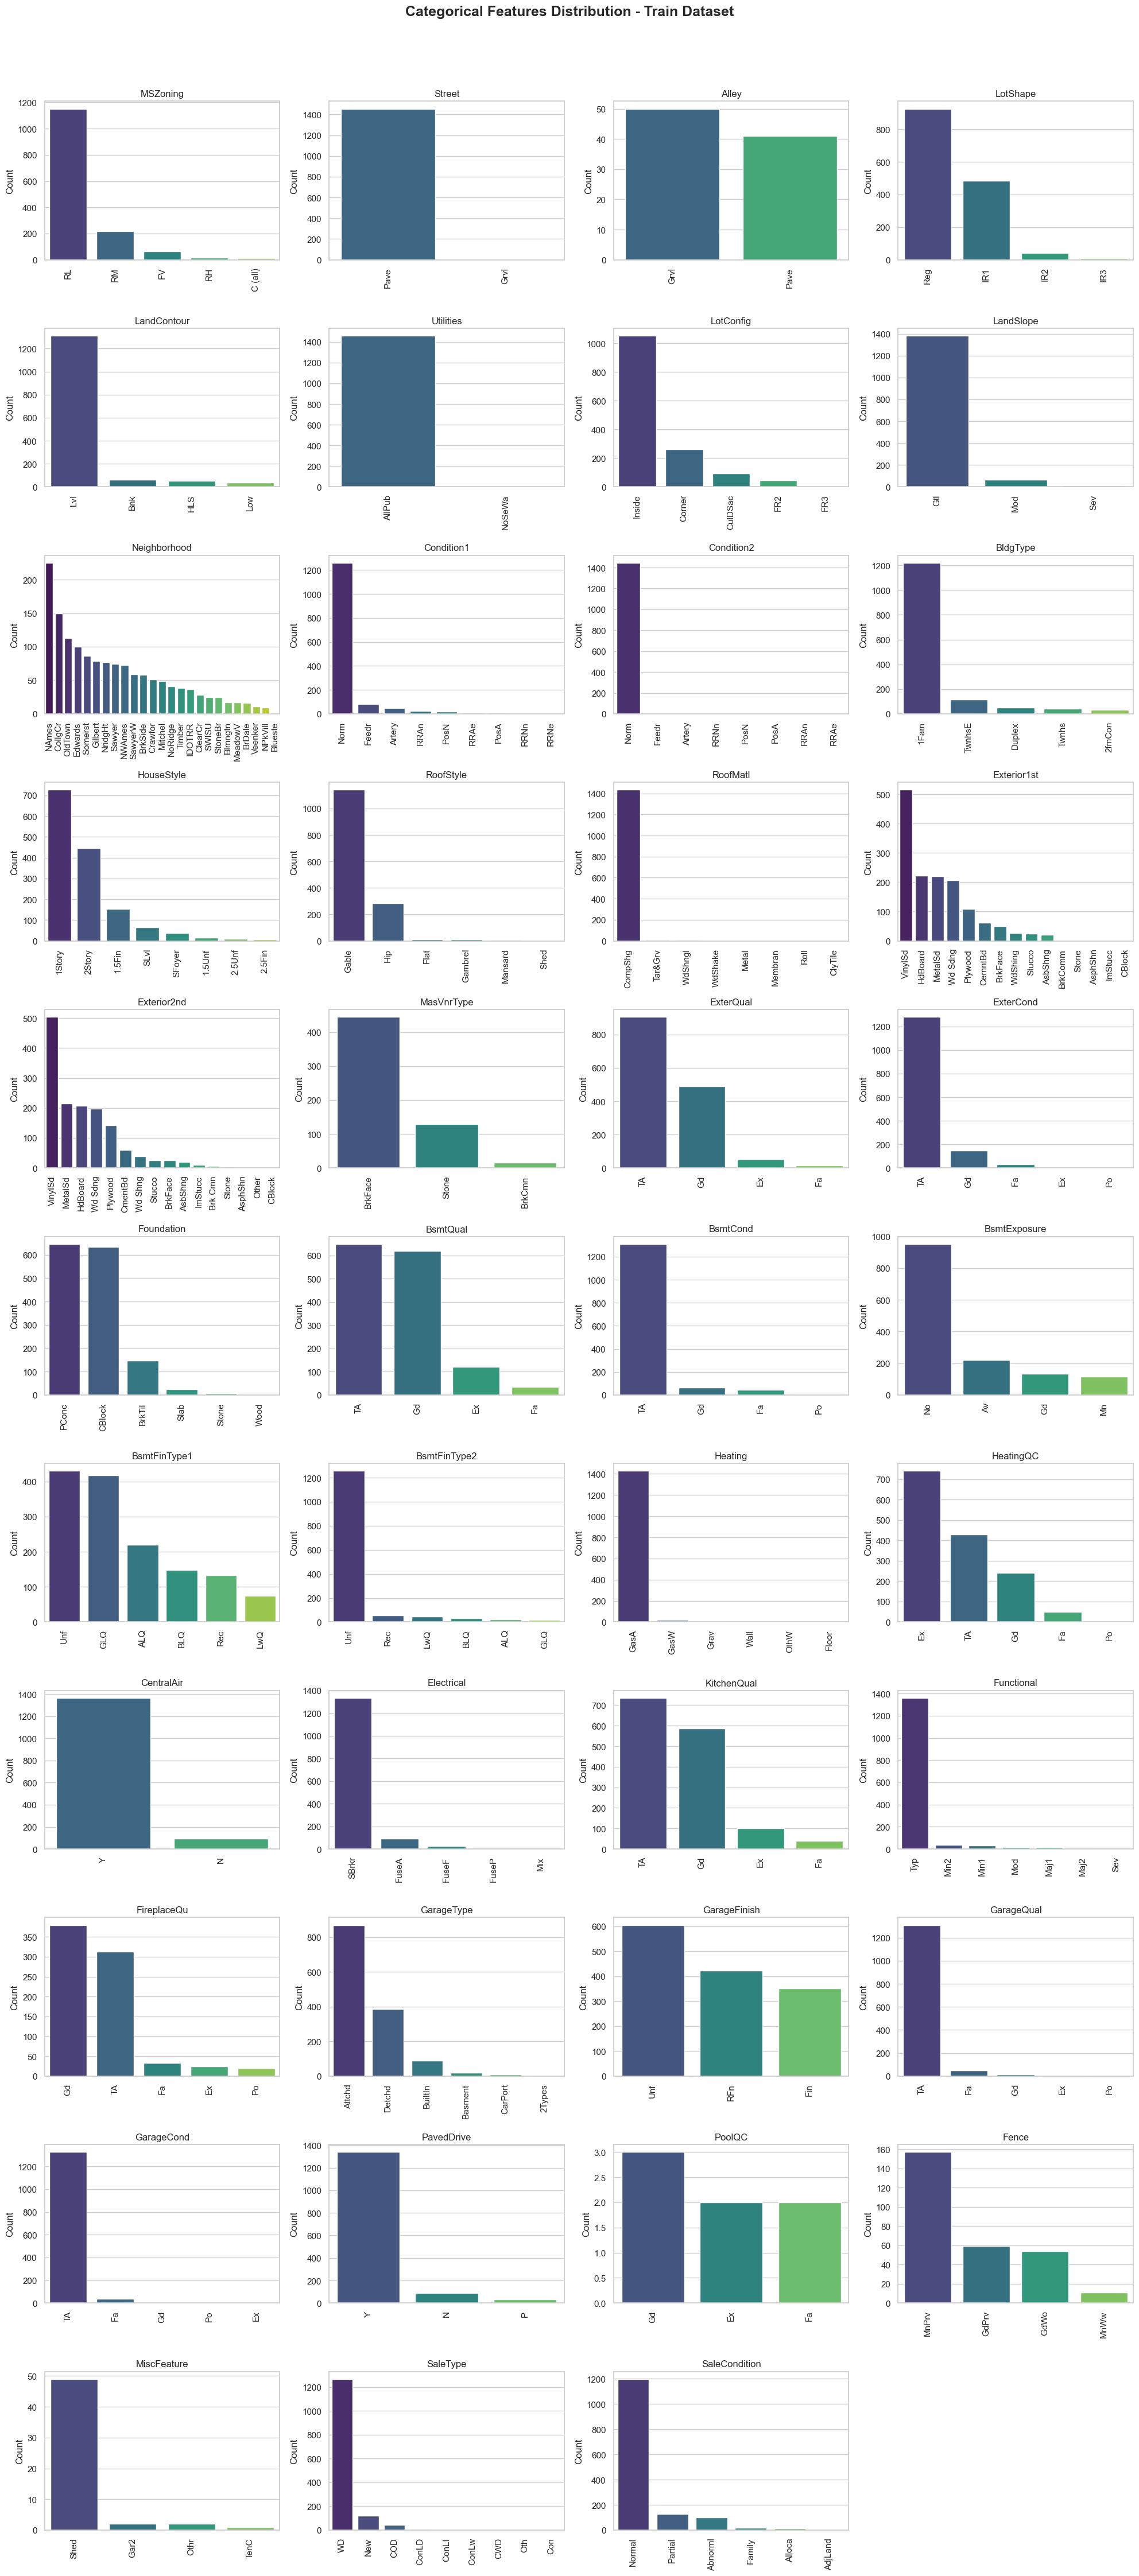

In [510]:
plot_categorical_values_distributions(datasets["train"],cat_cols_train,"Train Dataset")

### **3.1.2. Test Set**

In [511]:
na_counts_test = datasets["train"].isna().sum().reset_index()
na_counts_test.columns = ['Feature', 'MissingValues']

In [512]:
na_counts_test

Feature  MissingValues
0              Id              0
1      MSSubClass              0
2        MSZoning              0
3     LotFrontage            259
4         LotArea              0
..            ...            ...
76         MoSold              0
77         YrSold              0
78       SaleType              0
79  SaleCondition              0
80      SalePrice              0

[81 rows x 2 columns]

In [513]:
summary_nan_test = get_missing_value_summary(datasets["test"])

In [514]:
print(
    summary_nan_test[summary_nan_test["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
      PoolQC  object         1459           1456                 3       99.794380
 MiscFeature  object         1459           1408                51       96.504455
       Alley  object         1459           1352               107       92.666210
       Fence  object         1459           1169               290       80.123372
  MasVnrType  object         1459            894               565       61.274846
 FireplaceQu  object         1459            730               729       50.034270
 LotFrontage float64         1459            227              1232       15.558602
  GarageQual  object         1459             78              1381        5.346127
  GarageCond  object         1459             78              1381        5.346127
 GarageYrBlt float64         1459             78              1381        5.346127
GarageFinish  object         1459             78              1381        5.346127
  Ga

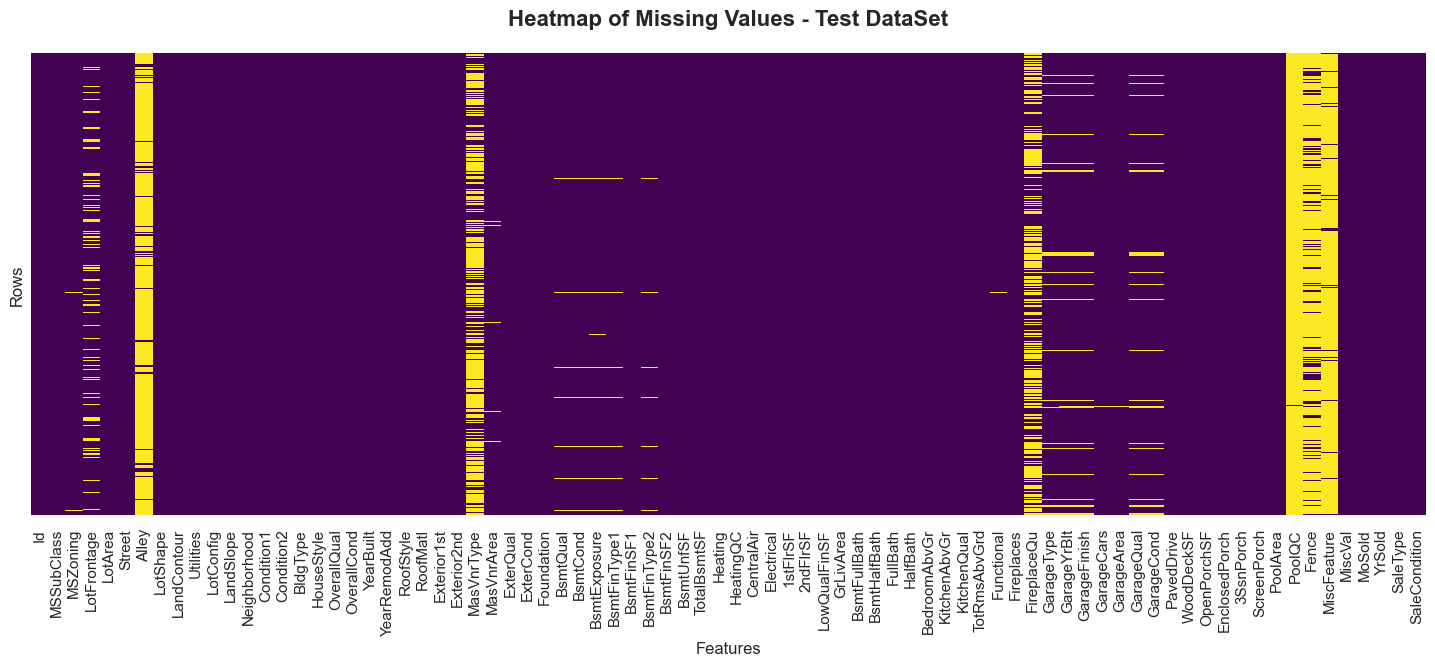

In [515]:
plot_missing_values_heatmap(datasets["test"], "Test DataSet")

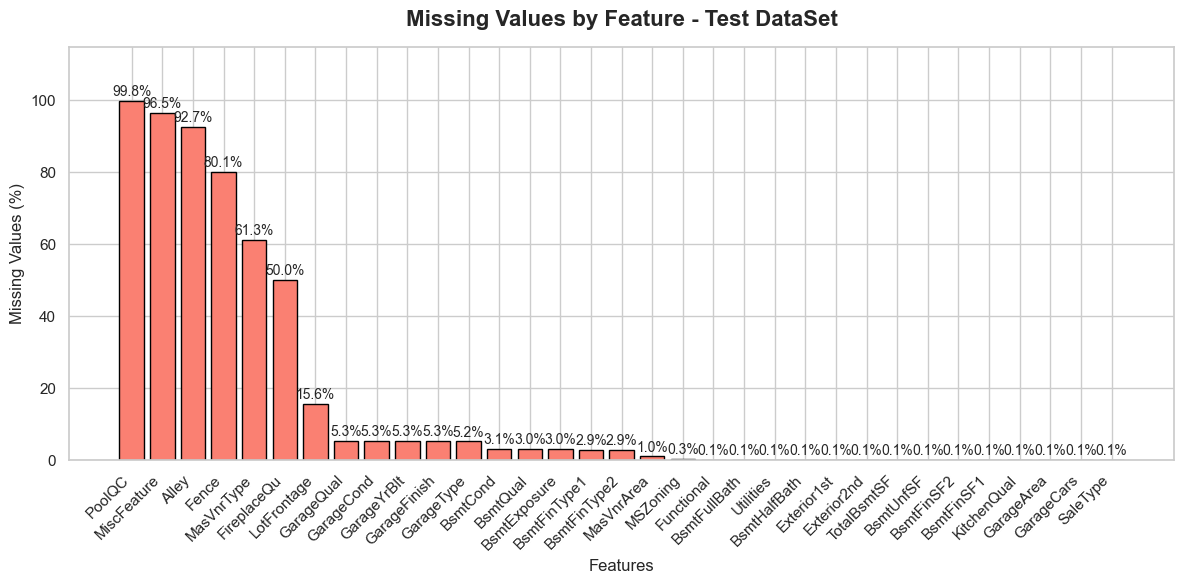

In [516]:
plot_missing_values_barchart(datasets["test"],"Test DataSet")

In [517]:
cat_cols_test, int_cols_test, float_cols_test = get_column_types(datasets["test"])

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Integer variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Real (float) variables:
['Lot

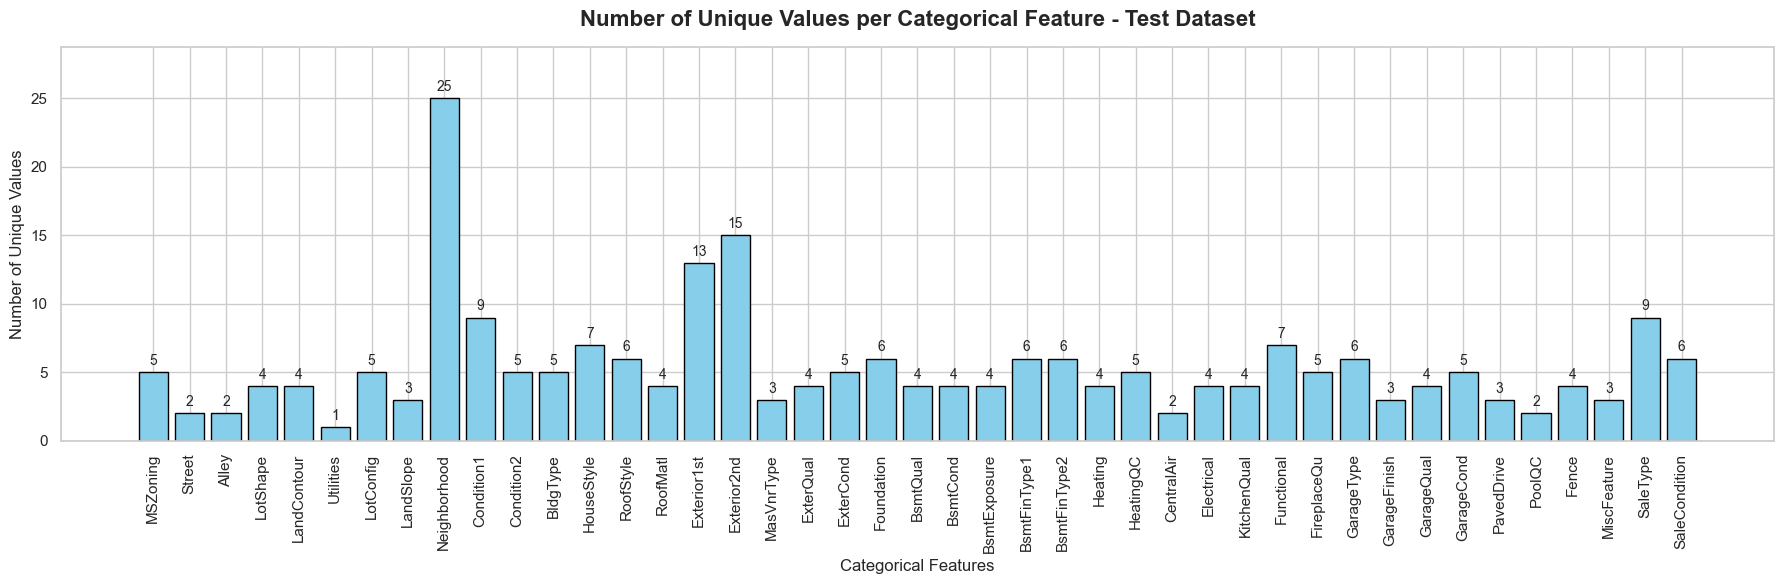

In [518]:
plot_number_of_unique_values(datasets["test"],cat_cols_test,"Test Dataset")

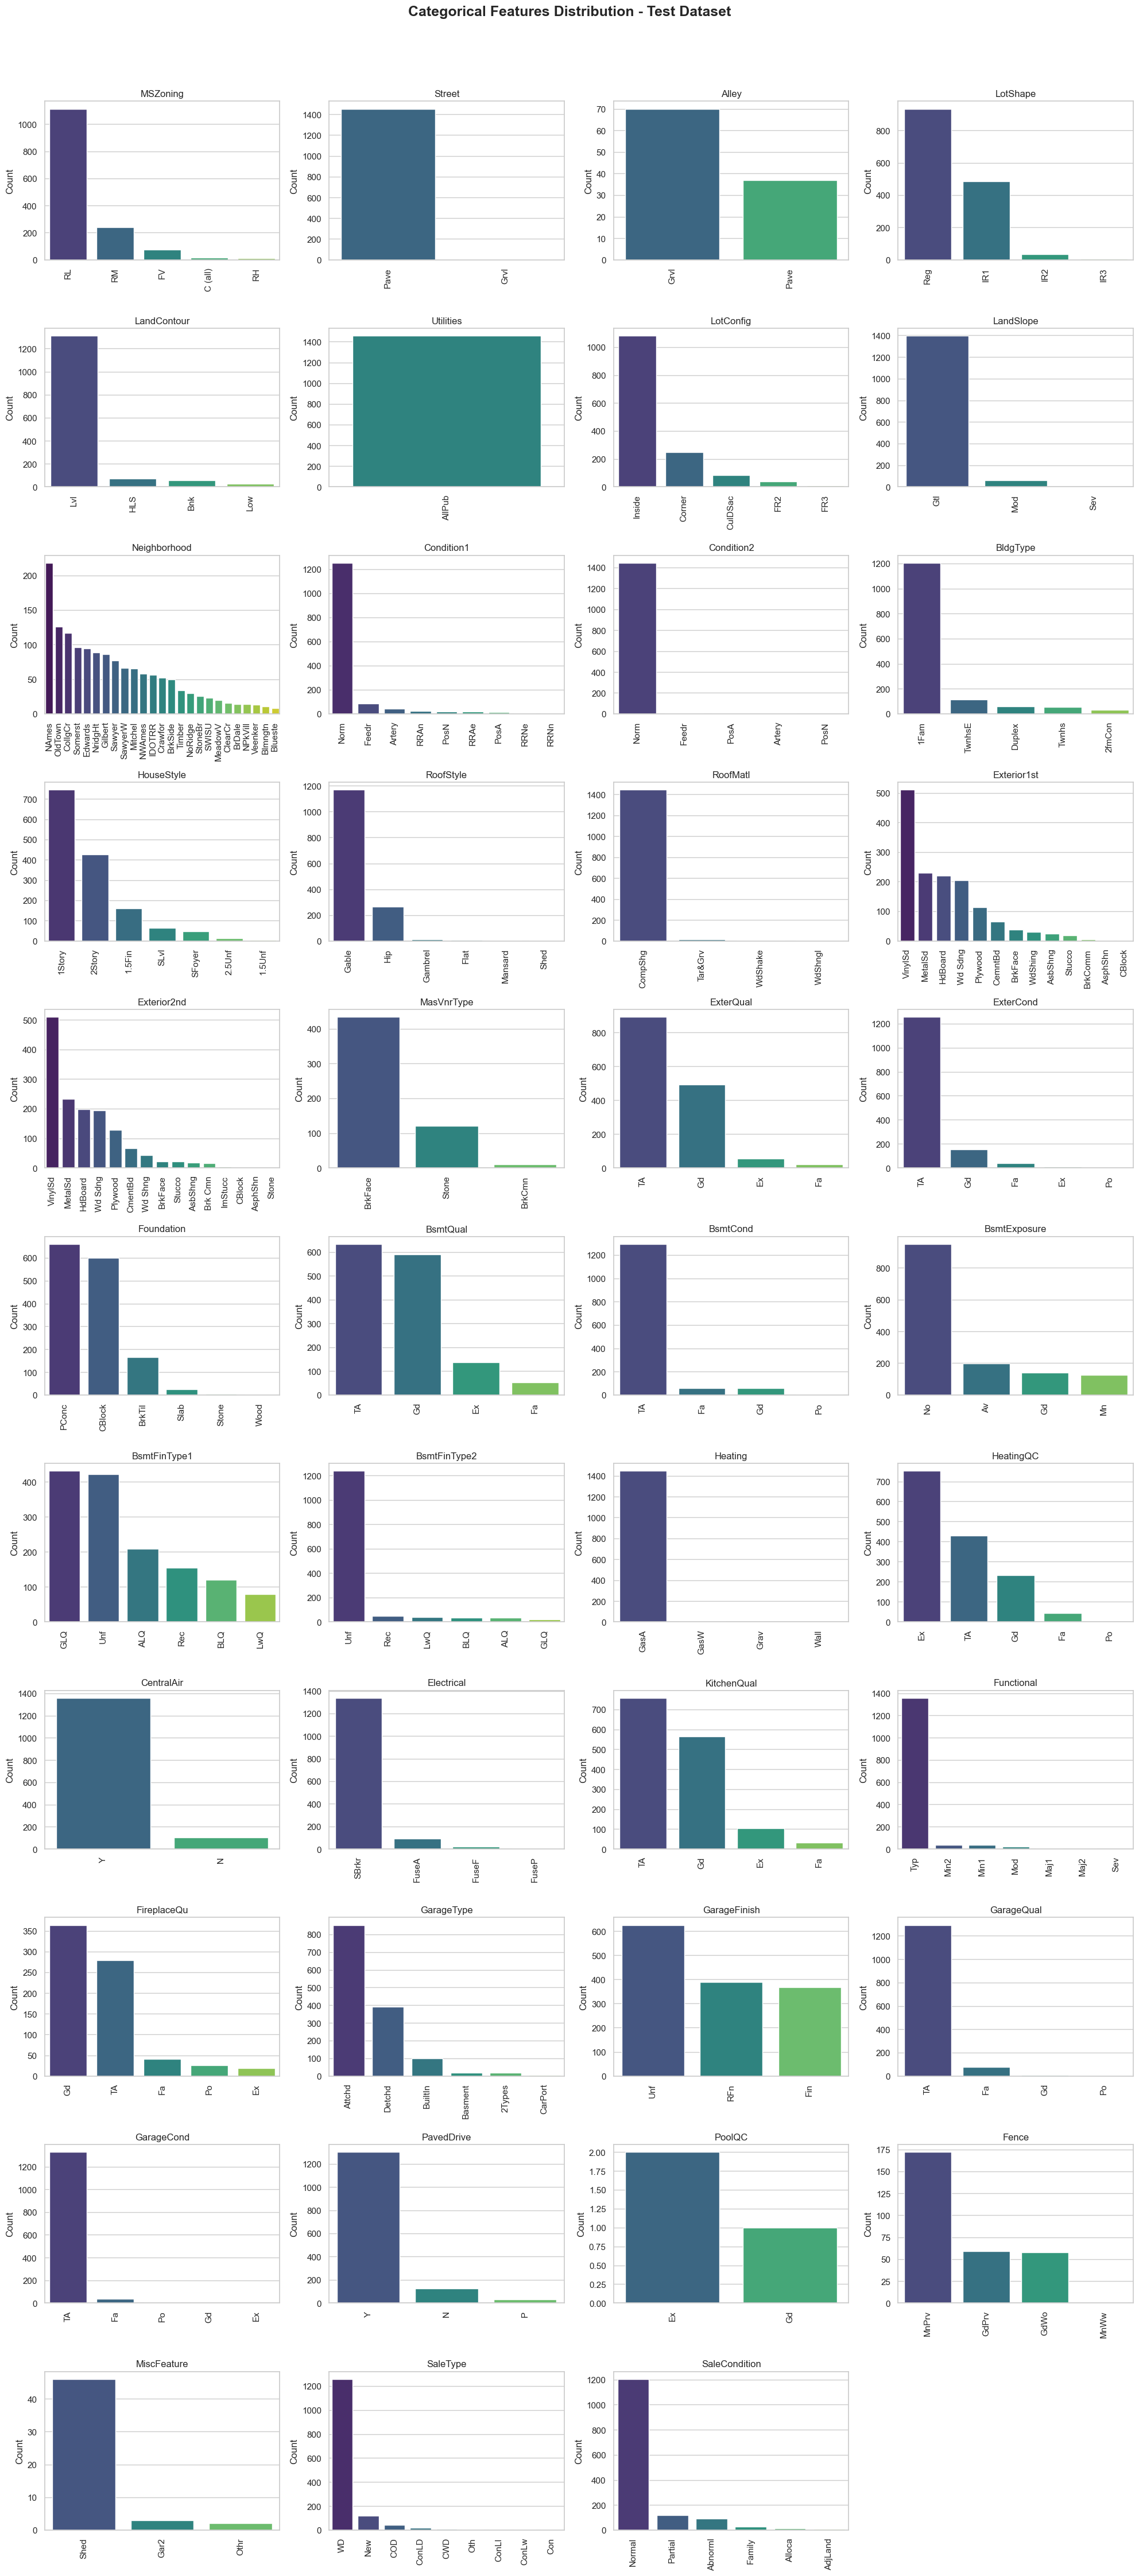

In [519]:
plot_categorical_values_distributions(datasets["test"],cat_cols_test,"Test Dataset")

### **3.1.3. Handling Missing Values**

We can remove features with more than 80% missing values. These features are unlike to help regression much.

In [520]:
print(
    summary_nan_train[summary_nan_train["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .head(5)
    .to_string(index=False)
)

     Column  Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
     PoolQC object         1460           1453                 7       99.520548
MiscFeature object         1460           1406                54       96.301370
      Alley object         1460           1369                91       93.767123
      Fence object         1460           1179               281       80.753425
 MasVnrType object         1460            872               588       59.726027


In [521]:
datasets["train"].drop(
    columns=["PoolQC", "MiscFeature", "Alley", "Fence"],
    inplace=True
)

In [522]:
datasets["test"].drop(
    columns=["PoolQC", "MiscFeature", "Alley", "Fence"],
    inplace=True
)

In [523]:
summary_nan_train = get_missing_value_summary(datasets["train"])

In [524]:
print(
    summary_nan_train[summary_nan_train["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .head(5)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
  MasVnrType  object         1460            872               588       59.726027
 FireplaceQu  object         1460            690               770       47.260274
 LotFrontage float64         1460            259              1201       17.739726
 GarageYrBlt float64         1460             81              1379        5.547945
GarageFinish  object         1460             81              1379        5.547945


In [525]:
datasets["train"]["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [526]:
datasets["train"]["MasVnrType"].fillna("None", inplace=True)

In [527]:
datasets["test"]["MasVnrType"].fillna("None", inplace=True)

In [528]:
datasets["train"]["MasVnrType_missing"] = (datasets["train"]["MasVnrType"] == "None").astype(int)

In [529]:
datasets["test"]["MasVnrType_missing"] = (datasets["test"]["MasVnrType"] == "None").astype(int)

In [530]:
datasets["train"]["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [531]:
datasets["train"]["FireplaceQu"].fillna("None", inplace=True)

In [532]:
datasets["test"]["FireplaceQu"].fillna("None", inplace=True)

In [533]:
datasets["train"]["FireplaceQu_missing"] = (datasets["train"]["FireplaceQu"] == "None").astype(int)

In [534]:
datasets["test"]["FireplaceQu_missing"] = (datasets["test"]["FireplaceQu"] == "None").astype(int)

In [535]:
nan = get_missing_value_summary(datasets["train"])

In [536]:
print(
    nan[nan["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
 LotFrontage float64         1460            259              1201       17.739726
 GarageYrBlt float64         1460             81              1379        5.547945
GarageFinish  object         1460             81              1379        5.547945
  GarageQual  object         1460             81              1379        5.547945
  GarageType  object         1460             81              1379        5.547945
  GarageCond  object         1460             81              1379        5.547945
BsmtFinType2  object         1460             38              1422        2.602740
BsmtExposure  object         1460             38              1422        2.602740
    BsmtQual  object         1460             37              1423        2.534247
BsmtFinType1  object         1460             37              1423        2.534247
    BsmtCond  object         1460             37              1423        2.534247
  Ma

LotFrontage: Impute missing values using neighborhood median rather than global median, houses in the same neighborhood tend to have similar lot frontage.

In [537]:
datasets["train"]["LotFrontage_missing"] = datasets["train"]["LotFrontage"].isna().astype(int)

In [538]:
datasets["train"]["LotFrontage"] = datasets["train"].groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

In [539]:
datasets["test"]["LotFrontage_missing"] = datasets["test"]["LotFrontage"].isna().astype(int)

In [540]:
datasets["test"]["LotFrontage"] = datasets["test"].groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

In [541]:
garage_cols_cat = ["GarageFinish", "GarageQual", "GarageType", "GarageCond"]
for col in garage_cols_cat:
    datasets["train"][col].fillna("None", inplace=True)

In [542]:
for col in garage_cols_cat:
    datasets["test"][col].fillna("None", inplace=True)

In [543]:
nan = get_missing_value_summary(datasets["test"])
print(
    nan[nan["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
 GarageYrBlt float64         1459             78              1381        5.346127
    BsmtCond  object         1459             45              1414        3.084304
    BsmtQual  object         1459             44              1415        3.015764
BsmtExposure  object         1459             44              1415        3.015764
BsmtFinType1  object         1459             42              1417        2.878684
BsmtFinType2  object         1459             42              1417        2.878684
  MasVnrArea float64         1459             15              1444        1.028101
    MSZoning  object         1459              4              1455        0.274160
   Utilities  object         1459              2              1457        0.137080
BsmtHalfBath float64         1459              2              1457        0.137080
BsmtFullBath float64         1459              2              1457        0.137080
  Fu

In [544]:
datasets["train"]["GarageYrBlt"].fillna(0, inplace=True)
datasets["train"]["Garage_missing"] = (datasets["train"]["GarageYrBlt"] == 0).astype(int)

In [545]:
datasets["test"]["GarageYrBlt"].fillna(0, inplace=True)
datasets["test"]["Garage_missing"] = (datasets["test"]["GarageYrBlt"] == 0).astype(int)

In [546]:
nan = get_missing_value_summary(datasets["test"])
print(
    nan[nan["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
    BsmtCond  object         1459             45              1414        3.084304
    BsmtQual  object         1459             44              1415        3.015764
BsmtExposure  object         1459             44              1415        3.015764
BsmtFinType1  object         1459             42              1417        2.878684
BsmtFinType2  object         1459             42              1417        2.878684
  MasVnrArea float64         1459             15              1444        1.028101
    MSZoning  object         1459              4              1455        0.274160
   Utilities  object         1459              2              1457        0.137080
  Functional  object         1459              2              1457        0.137080
BsmtHalfBath float64         1459              2              1457        0.137080
BsmtFullBath float64         1459              2              1457        0.137080
 Ext

Basement Columns ~3% missing Object

In [547]:
bsmt_cols = ["BsmtFinType1","BsmtFinType2","BsmtQual","BsmtCond","BsmtExposure"]
for col in bsmt_cols:
    datasets["train"][col].fillna("None", inplace=True)

In [548]:
for col in bsmt_cols:
    datasets["test"][col].fillna("None", inplace=True)

In [549]:
datasets["train"]["Bsmt_missing"] = (datasets["train"]["BsmtQual"] == "None").astype(int)

In [550]:
datasets["test"]["Bsmt_missing"] = (datasets["test"]["BsmtQual"] == "None").astype(int)

In [551]:
nan = get_missing_value_summary(datasets["train"])
print(
    nan[nan["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

    Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
MasVnrArea float64         1460              8              1452        0.547945
Electrical  object         1460              1              1459        0.068493


In [552]:
datasets["train"]["MasVnrArea"].fillna(0, inplace=True)

In [553]:
datasets["test"]["MasVnrArea"].fillna(0, inplace=True)

In [554]:
datasets["train"]["Electrical"].fillna(datasets["train"]["Electrical"].mode()[0], inplace=True)

In [555]:
nan = get_missing_value_summary(datasets["train"])
print(
    nan[nan["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

Empty DataFrame
Columns: [Column, Dtype, TotalValues, MissingValues, NonMissingValues, MissingPercent]
Index: []


In [556]:
nan = get_missing_value_summary(datasets["test"])
print(
    nan[nan["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
    MSZoning  object         1459              4              1455         0.27416
   Utilities  object         1459              2              1457         0.13708
BsmtFullBath float64         1459              2              1457         0.13708
BsmtHalfBath float64         1459              2              1457         0.13708
  Functional  object         1459              2              1457         0.13708
 Exterior2nd  object         1459              1              1458         0.06854
 Exterior1st  object         1459              1              1458         0.06854
   BsmtUnfSF float64         1459              1              1458         0.06854
  BsmtFinSF2 float64         1459              1              1458         0.06854
  BsmtFinSF1 float64         1459              1              1458         0.06854
 TotalBsmtSF float64         1459              1              1458         0.06854
 Kit

For object values most common value will be used to fill missing values

In [557]:
cols_mode = ["MSZoning", "Utilities", "Functional", "Exterior1st", "Exterior2nd", "KitchenQual", "SaleType"]
for col in cols_mode:
    mode_val = datasets["train"][col].mode()[0]
    datasets["test"][col].fillna(mode_val, inplace=True)

In [558]:
nan = get_missing_value_summary(datasets["test"])
print(
    nan[nan["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
BsmtHalfBath float64         1459              2              1457         0.13708
BsmtFullBath float64         1459              2              1457         0.13708
  BsmtFinSF1 float64         1459              1              1458         0.06854
  BsmtFinSF2 float64         1459              1              1458         0.06854
 TotalBsmtSF float64         1459              1              1458         0.06854
   BsmtUnfSF float64         1459              1              1458         0.06854
  GarageCars float64         1459              1              1458         0.06854
  GarageArea float64         1459              1              1458         0.06854


Using 0 for missing Basements/Garages. If median is used, use training set median

In [559]:
num_zero = ["BsmtFullBath", "BsmtHalfBath", "BsmtUnfSF", "BsmtFinSF2",
            "BsmtFinSF1", "TotalBsmtSF", "GarageCars", "GarageArea"]
for col in num_zero:
    datasets["test"][col].fillna(0, inplace=True)

In [560]:
nan = get_missing_value_summary(datasets["test"])
print(
    nan[nan["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

Empty DataFrame
Columns: [Column, Dtype, TotalValues, MissingValues, NonMissingValues, MissingPercent]
Index: []


### DATA PREPROCESSING

In [561]:
datasets["train"].dtypes

Id                       int64
MSSubClass               int64
MSZoning                object
LotFrontage            float64
LotArea                  int64
                        ...   
MasVnrType_missing       int64
FireplaceQu_missing      int64
LotFrontage_missing      int64
Garage_missing           int64
Bsmt_missing             int64
Length: 82, dtype: object

In [562]:
categorical_cols = datasets["train"].select_dtypes(include='object').columns
print(categorical_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [563]:
train_encoded = pd.get_dummies(datasets["train"], columns=categorical_cols, drop_first=True)
test_encoded = pd.get_dummies(datasets["test"], columns=categorical_cols, drop_first=True)


In [564]:
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

In [565]:
train_encoded

Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
0        1          60  ...                  True                  False
1        2          20  ...                  True                  False
2        3          60  ...                  True                  False
3        4          70  ...                 False                  False
4        5          60  ...                  True                  False
...    ...         ...  ...                   ...                    ...
1455  1456          60  ...                  True                  False
1456  1457          20  ...                  True                  False
1457  1458          70  ...                  True                  False
1458  1459          20  ...                  True                  False
1459  1460          20  ...                  True                  False

[1460 rows x 253 columns]

In [566]:
X_train = train_encoded.drop(["Id", "SalePrice"], axis=1)  # features
y_train = train_encoded["SalePrice"]                # target

In [567]:
X_test = test_encoded

In [568]:
test_ids = X_test["Id"].copy()  # save Ids
X_test = X_test.drop("Id", axis=1)

In [569]:
print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:',  X_test.shape)


Check that the datasets are consistent:

X_train shape (1460, 251)
y_train shape: (1460,)
X_test shape: (1459, 252)


In [570]:
# Align test set columns with train set columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [571]:
print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:',  X_test.shape)


Check that the datasets are consistent:

X_train shape (1460, 251)
y_train shape: (1460,)
X_test shape: (1459, 251)


A — Preprocessing pipeline (numerical + categorical)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# replace these lists with your real column names
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   # or neighborhood median for LotFrontage manually
    ('scaler', StandardScaler())                      # for models that need scaling
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

B — Define top models & param grids (examples)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet

models_and_grids = {
    'XGB': {
        'model': XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
        'params': {
            'model__n_estimators': [100, 300, 700],
            'model__max_depth': [3, 6, 9],
            'model__learning_rate': [0.01, 0.05, 0.1],
            'model__subsample': [0.6, 0.8, 1.0],
        }
    },
    'RFR': {
        'model': RandomForestRegressor(random_state=42, n_jobs=-1),
        'params': {
            'model__n_estimators': [100, 300],
            'model__max_depth': [None, 10, 30],
            'model__min_samples_leaf': [1, 3, 5]
        }
    },
    'GBR': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 300],
            'model__learning_rate': [0.01, 0.05, 0.1],
            'model__max_depth': [3, 5, 8]
        }
    },
    'LR': {
        'model': ElasticNet(random_state=42),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0],
            'model__l1_ratio': [0.1, 0.5, 0.9]
        }
    }
}


C — Run RandomizedSearchCV for each model (fast search)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
import time

# CV config
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Where we'll store best models and a summary
best_models = {}
tuning_summary = []

# RandomizedSearch settings (tweak n_iter to trade time vs thoroughness)
n_iter_search = 30
random_state = 42

for name, mg in models_and_grids.items():
    print(f"\n--- Tuning {name} ---")
    start = time.time()
    
    # Build pipeline: preprocessor -> model
    pipeline = Pipeline([
        ('preproc', preprocessor),   # your ColumnTransformer
        ('model', mg['model'])
    ])
    
    param_dist = mg.get('params', {})  # parameter grid for RandomizedSearchCV
    
    # RandomizedSearchCV (use neg_root_mean_squared_error to optimize RMSE)
    rs = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=n_iter_search,
        scoring='neg_root_mean_squared_error',
        cv=kf,
        verbose=1,
        n_jobs=-1,
        random_state=random_state,
        refit=True
    )
    
    # fit
    rs.fit(X_train, y_train)
    elapsed = time.time() - start
    
    # store best estimator and results
    best_models[name] = rs.best_estimator_
    tuning_summary.append({
        'model': name,
        'best_score_negRMSE': rs.best_score_,
        'best_RMSE': -rs.best_score_,           # convert to positive RMSE
        'best_params': rs.best_params_,
        'n_iter': n_iter_search,
        'time_sec': elapsed
    })
    
    print(f"{name} done in {elapsed:.0f}s — best RMSE: {-rs.best_score_:.4f}")


In [ ]:
tuning_df = pd.DataFrame(tuning_summary).sort_values('best_RMSE')
tuning_df

In [ ]:
import matplotlib.pyplot as plt

# Suppose this is your final trained best model (after refit=True in RandomizedSearchCV)
best_model = rs.best_estimator_   # rs is your RandomizedSearchCV object

# Predictions on the training set
y_pred_train = best_model.predict(X_train)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred_train, alpha=0.6, edgecolor="k")
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Best Model: Actual vs Predicted SalePrice")
plt.legend()
plt.show()


In [572]:
# Use the best hyperparameters you found
best_gbr_params = {
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.05
}

gbr_final = GradientBoostingRegressor(**best_gbr_params, random_state=42)

# Fit on the full training data (X_train, y_train)
gbr_final.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
                          random_state=42)

In [573]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('gbr', GradientBoostingRegressor(n_estimators=300, max_depth=5, learning_rate=0.05, random_state=42))
])

# Fit on full training data
gbr_pipeline.fit(X_train, y_train)

# Predict on test
y_test_pred = gbr_pipeline.predict(X_test)


In [574]:
submission = pd.DataFrame({
    "Id": test_ids,  # Make sure this column exists in your test set
    "SalePrice": y_test_pred
})

submission.to_csv("submission.csv", index=False)
print("Submission ready!")

Submission ready!


In [575]:
import pickle
# Save the model to a file
with open("gbr_model.pkl", "wb") as f:
    pickle.dump(gbr_final, f)